# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Alya Fauzia Azizah
- **Email:** alyafauziaaz25@gmail.com
- **ID Dicoding:** alyafauzia

## Menentukan Pertanyaan Bisnis

1. Bagaimana pola dari peminjaman sepeda berdasarkan jam?
2. Bagaimana tren peminjaman sepeda pada hari kerja dengan hari libur?
3. Bagaimana pola dari peminjaman sepeda pada setiap musimnya?

## Import Semua Packages/Library yang Digunakan

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [88]:
day_data = pd.read_csv('data/day.csv')
hour_data = pd.read_csv('data/hour.csv')
day_data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [89]:
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [90]:
print('Jumlah baris pada tabel hour ', hour_data.isnull().any(axis=1).sum())
print('Jumlah data yang duplicated ', hour_data.duplicated().sum())

Jumlah baris pada tabel hour  0
Jumlah data yang duplicated  0


Data yang akan digunakan hour_data dan tidak ada baris yang kosong dan duplicated.

In [91]:
invalid_number = hour_data[(hour_data['casual']<0) | (hour_data['registered']<0)]

if not invalid_number.empty:
    print("Nilai tidak valid atau bernilai negatif:")
    print(invalid_number)
else:
    print("Tidak ada nilai yang tidak valid atau negatif")

discrepancy_values = hour_data[hour_data['cnt'] != (hour_data['casual']) + (hour_data['registered'])]

if not discrepancy_values.empty:
    print('Ketidaksesuaian nilai ditemukan pada baris', len(discrepancy_values))
    print(discrepancy_values)
else:
    print('Tidak ada nilai yang tidak sesuai, cnt = casual + registered')

Tidak ada nilai yang tidak valid atau negatif
Tidak ada nilai yang tidak sesuai, cnt = casual + registered


**Insight:**
- Pada dataset day berjumlah 731, sedangkan pada dataset hour berjumlah 17379 yang berisi dari jam 0 hingga 23 selama tahun 2011 hingga 2012.
- Tidak ada data yang kosong.
- Tidak ada data yang sama atau duplicates.
- Tidak ada data untuk pengguna casual dan registered yang bernilai negatif.
- Nilai pada cnt sudah sesuai, jumlah dari casual + registered.

### Assessing Data

In [92]:
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Kolom season, yr, mnth, dan hr didasarkan pada jumlah perhitungan dan kosisten. Diperlukan visualisasi untuk dilakukan analisis mendalam.
- Pada kolom **casual**, menunjukan pelanggan tanpa keanggotaan. Nilai presentil Q1 = 4 lebih kecil dari presentil Q3 = 48. Nilai standar deviasi (std) = 49 lebih besar dari rata-rata (mean) = 35. Sehingga pada casual menunjukkan *Right-Skewd Distribution*.
- Pada kolom **registered**, menunjukkan pelanggan dengan membership. Memiliki nilai presentil Q1 = 34 lebih kecil dari presentil Q3 = 220. Nilai standar deviasi (std) = 151 dekat dengan (mean) = 153. Sehingga pada casual menunjukkan *Right-Skewd Distribution*.
- Pada kolom **cnt**, menunjukkan jumlah pelanggan pada setiap jam, menunjukkan persebaran data. Nilai minimal 1 dan maksimal 977 memiliki potensi outlier. Nilai presentil Q1 = 40 lebih kecil dari presentil Q3 = 281 menunjukkan bahwa pada kolom cnt memiliki *Right-Skewd Distribution*.
- Maka dari itu perlu dipastikan bahwa cnt merupakan jumlah dari kolom casual dan registered.

### Cleaning Data

In [93]:
# Define
# Mengganti hasil nilai angka menjadi keterangan
# Mengganti tipe data pada dteday menjadi datetime dan season, yr, mnth, hr, holiday, weekday, workingday, dan weatersit menjadi category
hour_data_clean = hour_data
# Code
# Mengganti nilai angka menjadi keterangan
hour_data_clean['mnth'] = hour_data_clean['mnth'].map({
    1: 'Januari', 2:'Februari', 3:'Maret', 4:'April', 5:'Mei', 6:'Juni',
    7: 'Juli', 8:'Agustus', 9:'September', 10:'Oktober', 11: 'November', 12: 'Desember'
})

hour_data_clean['weekday'] = hour_data_clean['weekday'].map({0:'Minggu', 1:'Senin', 2:'Selasa',
                                                 3:'Rabu', 4:'Kamis', 5:'Jumat', 6:'Sabtu', 7:'Minggu'})
hour_data_clean['season'] = hour_data_clean['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

hour_data_clean['weathersit'] = hour_data_clean['weathersit'].map({
    1: 'Cerah/Berawan Sebagian',
    2: 'Berkabut/Berawan',
    3: 'Salju Ringan/Hujan',
    4: 'Cuaca Buruk'
})

hour_data_clean['yr'] = hour_data_clean['yr'].map({
    0: '2011', 1: '2012'
})

hour_data_clean['workingday'] = hour_data_clean['workingday'].map({
    0: 'Holiday', 1: 'Workingday'
})

In [94]:
hour_data_clean['dteday'] = pd.to_datetime(hour_data_clean['dteday'], format="%Y-%m-%d")
hour_data_clean['season'] = hour_data_clean.season.astype('category')
hour_data_clean['yr'] = hour_data_clean.yr.astype('category')
hour_data_clean['mnth'] = hour_data_clean.mnth.astype('category')
hour_data_clean['hr'] = hour_data_clean.hr.astype('category')
hour_data_clean['holiday'] = hour_data_clean.holiday.astype('category')
hour_data_clean['workingday'] = hour_data_clean.workingday.astype('category')
hour_data_clean['weekday'] = hour_data_clean.weekday.astype('category')
hour_data_clean['weathersit'] = hour_data_clean.weathersit.astype('category')

In [95]:

# Test
hour_data_clean

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Januari,0,0,Sabtu,Holiday,Cerah/Berawan Sebagian,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,Spring,2011,Januari,1,0,Sabtu,Holiday,Cerah/Berawan Sebagian,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,Spring,2011,Januari,2,0,Sabtu,Holiday,Cerah/Berawan Sebagian,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,Spring,2011,Januari,3,0,Sabtu,Holiday,Cerah/Berawan Sebagian,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,Spring,2011,Januari,4,0,Sabtu,Holiday,Cerah/Berawan Sebagian,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Spring,2012,Desember,19,0,Senin,Workingday,Berkabut/Berawan,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,Spring,2012,Desember,20,0,Senin,Workingday,Berkabut/Berawan,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,Spring,2012,Desember,21,0,Senin,Workingday,Cerah/Berawan Sebagian,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,Spring,2012,Desember,22,0,Senin,Workingday,Cerah/Berawan Sebagian,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Kolom dteday merupakan tanggal sehingga diubah tipe data menjadi datetime.
- Kolom season, yr, mnth, hr, holiday, weekday, workingday, dan weatersit merupakan tipe data category karena setiap angka mewakili kelompok tertentu dan dikonversi ke dalam bentuk sebenarnya.

## Exploratory Data Analysis (EDA)

1. Membuat diagram batang untuk melihat perbandingan distribusi pelanggan casual dan registered.
2. Membuat boxplot untuk mengetahui dan mengahandle nilai outlier sebelum dan sesudah.
3. Mengatasi nilai outlier dengan metode IQR untuk casual, registered, dan cnt.
4. Membuat visualisasi matriks korelasi untuk mengetahui hubungan antar fitur.

1. Diagram batang distribusi pelanggan casual dan registered

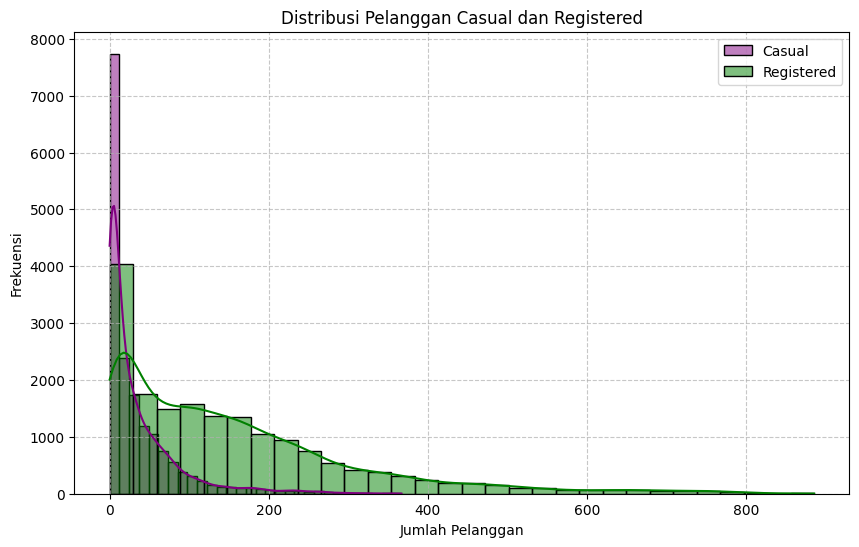

In [96]:
plt.figure(figsize=(10,6))

sns.histplot(hour_data_clean['casual'], bins=30, color='purple', label='Casual', alpha=0.5, kde=True)
sns.histplot(hour_data_clean['registered'], bins=30, color='green', label='Registered', alpha=0.5, kde=True)

plt.legend()
plt.title('Distribusi Pelanggan Casual dan Registered')
plt.xlabel('Jumlah Pelanggan')
plt.ylabel('Frekuensi')
plt.grid(True, linestyle="--", alpha = 0.7)

plt.show()

**Insight:**
1. Tabel Casual (ditunjukkan pada garis ungu)
- Menunjukkan adanya outlier, pada awal tabel meunjukkan nilai yang tinggi dan mengalami kejatuhan yang besar sebelum grafik berada di tengah.
- Menunjukkan *Right-Skewed Distribution*, nilai peminjaman terkonsentrasi pada nilai yang rendah.
2. Tabel Registered (ditunjukkan pada garis berwarna hijau)
- Menunjukkan adanya outlier, namun tidak separah tabel casual dan distribusi lebih luas.
- Distribusi yang luas menunjukkan bahwa pelanggan registered lebih sering melakukan peminjaman dibandingkan dengan pelanggan casual.
- Menunjukkan *Right-Skewed Distribution*, namun titik tertinggi tidak sebanyak pelanggan casual.

2. Visualisasi handling outlier

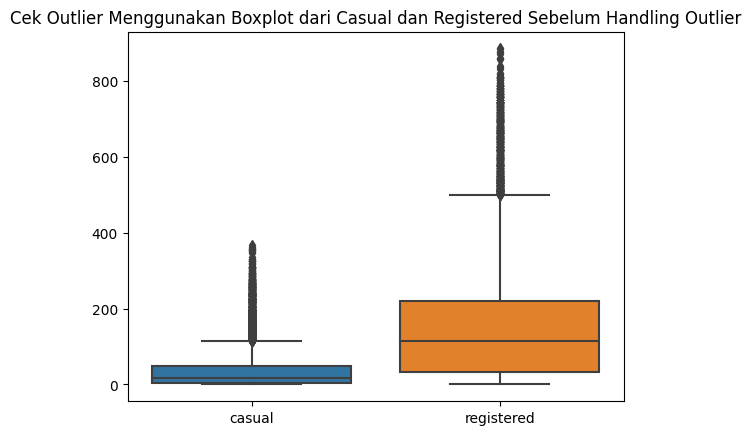

In [97]:
# Mengecek nilai outlier

sns.boxplot(data=hour_data_clean[['casual','registered']])
plt.title('Cek Outlier Menggunakan Boxplot dari Casual dan Registered Sebelum Handling Outlier')
plt.show()

**Insight**
- Pada data registered dan casual memiliki banyak nilai outlier
- Diperlukan handling outlier dan akan menggunakan metode IQR

3. Mengatasi outlier

In [98]:
def remove_outlier(df, col):
    Q1 = df[col].quantile(0.25) # Kualtil 1
    Q3 = df[col].quantile(0.75) # Kualtil 3
    IQR = Q3 - Q1

    # Batas bawah dan atas
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return df[(df[col] >= lower) & (df[col] <= upper)]

# Variabel hour data dengan kategorikal
hour_data_cleaned = remove_outlier(hour_data_clean, 'casual')
hour_data_cleaned = remove_outlier(hour_data_clean, 'registered')
hour_data_cleaned = remove_outlier(hour_data_clean, 'cnt')

print(f"Jumlah data sebelum cleaning: {len(hour_data_clean)}")
print(f"Jumlah data sesudah cleaning: {len(hour_data_cleaned)}")

Jumlah data sebelum cleaning: 17379
Jumlah data sesudah cleaning: 16874


In [99]:
# save cleaned data
hour_data_cleaned.to_csv("dashboard/main_data.csv")

In [100]:

hour_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16874 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     16874 non-null  int64         
 1   dteday      16874 non-null  datetime64[ns]
 2   season      16874 non-null  category      
 3   yr          16874 non-null  category      
 4   mnth        16874 non-null  category      
 5   hr          16874 non-null  category      
 6   holiday     16874 non-null  category      
 7   weekday     16874 non-null  category      
 8   workingday  16874 non-null  category      
 9   weathersit  16874 non-null  category      
 10  temp        16874 non-null  float64       
 11  atemp       16874 non-null  float64       
 12  hum         16874 non-null  float64       
 13  windspeed   16874 non-null  float64       
 14  casual      16874 non-null  int64         
 15  registered  16874 non-null  int64         
 16  cnt         16874 non-null 

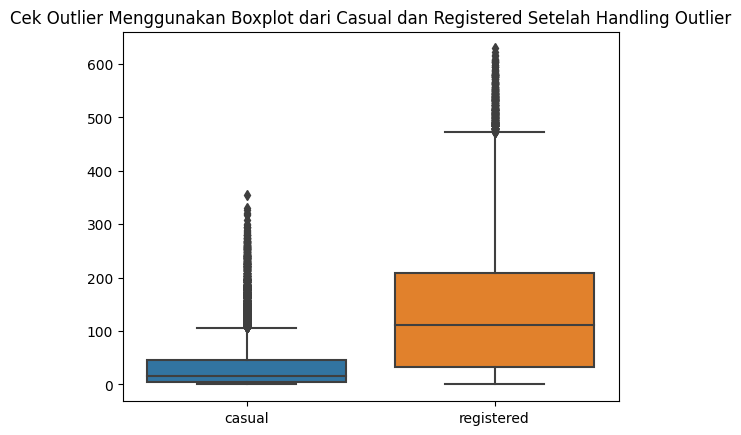

In [101]:
# Mengecek nilai outlier setelah handling outlier
hour_data = hour_data_cleaned

sns.boxplot(data=hour_data_cleaned[['casual','registered']])
plt.title('Cek Outlier Menggunakan Boxplot dari Casual dan Registered Setelah Handling Outlier')
plt.show()

**Insight**
- Penurunan jumlah data sebesar 505 baris setelah handling outlier menggunakan IQR
- Outlier setelah handling outlier masih ada, namun tidak sebanyak sebelum handling outlier
- Pada Registered memiliki kotak yang lebih besar mengindikasi bahwa variasi data lebih lebar dibandingkan pengguna biasa.

4. Matriks korelasi hubungan antar fitur

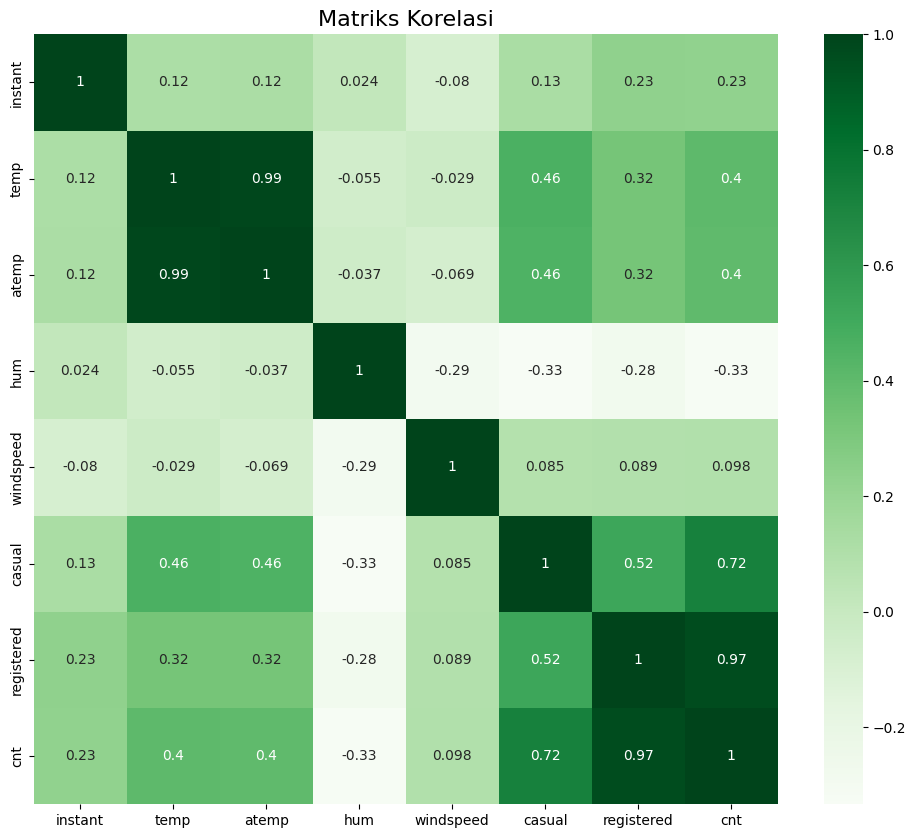

In [102]:
# Memilih hanya kolom numerik
hour_data_num = hour_data_cleaned.select_dtypes(include=['number'])

# Membuat Matriks Korelasi
plt.figure(figsize=(12,10))
correlation_matrix = hour_data_num.corr()
sns.heatmap(correlation_matrix, cmap='Greens', annot=True)
plt.title('Matriks Korelasi', fontsize=16)
plt.show()

**Insight**
- Fitur atemp dan temp memiliki keterkaitan yang sangat dekat hampir mendekati angka 1.
- Keterkaitan atau korelasi fitur casual terhadap cnt lebih rendah dibandingkan dengan registered terhadap cnt.
- Fitur cuaca, seperti temp, atemp, dan windspeed memiliki keterkaitan yang positif dengan pengguna casual, registered, dan cnt.
- Kelembapan (hum) tidak menunjukkan keterkaitan yang positif dengan pengguna casual, registered, dan cnt.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana pola dari peminjaman sepeda berdasarkan jam?

In [103]:
hourly_trend = hour_data.groupby("hr")[["casual", "registered"]].mean().reset_index()
hourly_trend

,hr,casual,registered
0,0,10.158402,43.739669
1,1,6.504144,26.871547
2,2,4.772028,18.097902
3,3,2.715925,9.011478
4,4,1.253945,5.098996
5,5,1.411437,18.478382
6,6,4.161379,71.882759
7,7,11.055021,201.009629
8,8,19.550000,264.975000
9,9,30.891334,188.418157


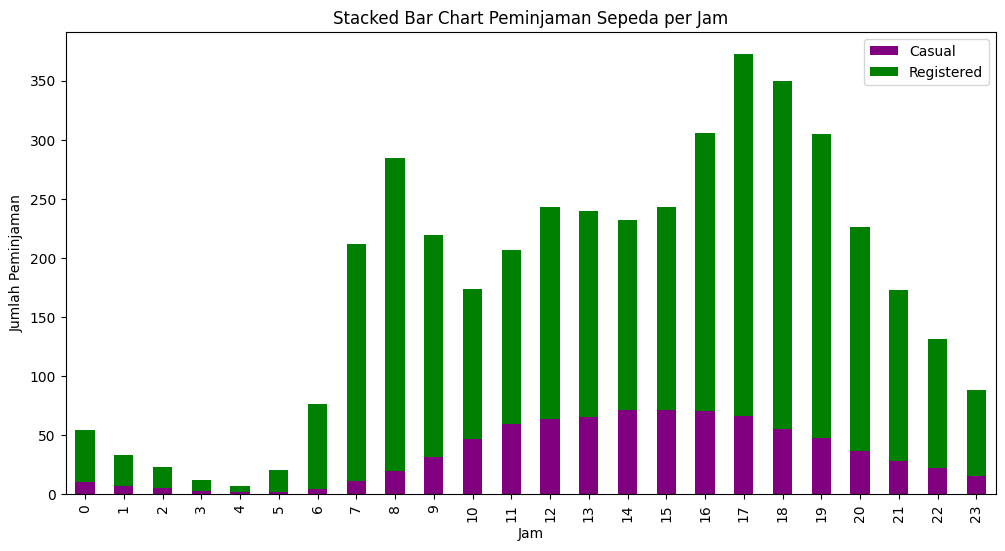

In [104]:
fig, ax = plt.subplots(figsize=(12,6))
hourly_trend.plot(kind="bar", stacked=True, color=['Purple', 'Green'], ax=ax)
ax.set_title("Stacked Bar Chart Peminjaman Sepeda per Jam")
ax.set_xlabel("Jam")
ax.set_ylabel("Jumlah Peminjaman")
ax.legend(["Casual", "Registered"])
plt.show()

**Insight**
- Peminjam dari pelanggan terdaftar (registered) lebih banyak dibandingkan dengan peminjam biasa (casual)
- Pola peminjam kategori registered mengalami lonjakan pada pukul 7-9 pagi dan 17-19 pagi. Menandakan peminjam digunakan untuk keperluan kantor atau sekolah.
- Pola peminjam kategori casual mulai meningkat hingga pukul 11-18 sore. Menandakan peminjam untuk keperluan aktivitas di siang hari.

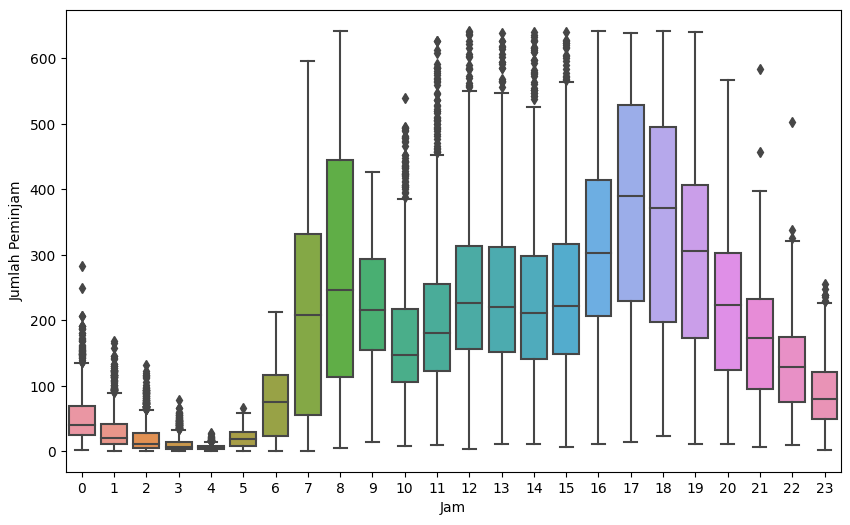

In [105]:
fig,ax=plt.subplots(figsize=(10,6))
sns.boxplot(data=hour_data, x='hr', y='cnt')
ax.set_ylabel('Jumlah Peminjam')
ax.set_xlabel('Jam')
plt.show()

**Insight**
- Adanya outlier di jam sibuk (7-9 dan 17-19) dan jam malam (21-23), menunjukkan adanya lonjakan peminjaman pada hari-hari tertentu.
- Sementara itu, nilai outlier paling tinggi terlihat pada siang hari dari pukul 10-15 siang.
- Terdapat pada pola yang besar peminjaman sepeda di hari-hari tertentu.

### Pertanyaan 2:
2. Bagaimana tren peminjaman sepeda pada hari kerja dengan hari libur?

In [106]:
day = {0: 'Senin', 1: 'Selasa', 2: 'Rabu', 3: 'Kamis', 4: 'Jumat', 5: 'Sabtu', 6: 'Minggu'}
dayy = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
daily_tren = day_data.groupby('weekday')[['casual', 'registered', 'cnt']].agg(['max', 'min', 'mean']).reset_index()
daily_tren['weekday'] = daily_tren['weekday'].map(day)
daily_tren = daily_tren.set_index('weekday').reindex(dayy)
daily_tren

casual                  registered                      cnt        \
           max min         mean        max   min         mean   max   min   
weekday                                                                     
Senin     3283  54  1338.295238       5657   451  2890.533333  8227   605   
Selasa    3065   2   674.133333       6435    20  3663.990476  7525    22   
Rabu      1348   9   556.182692       6697   573  3954.480769  7767   683   
Kamis     2562   9   551.144231       6946   432  3997.394231  8173   441   
Jumat     1405  15   590.961538       6781   416  4076.298077  7804   431   
Sabtu     2469  38   752.288462       6917  1129  3938.000000  8362  1167   
Minggu    3410  57  1465.257143       5966   570  3085.285714  8714   627   

                      
                mean  
weekday               
Senin    4228.828571  
Selasa   4338.123810  
Rabu     4510.663462  
Kamis    4548.538462  
Jumat    4667.259615  
Sabtu    4690.288462  
Minggu   4550.542857

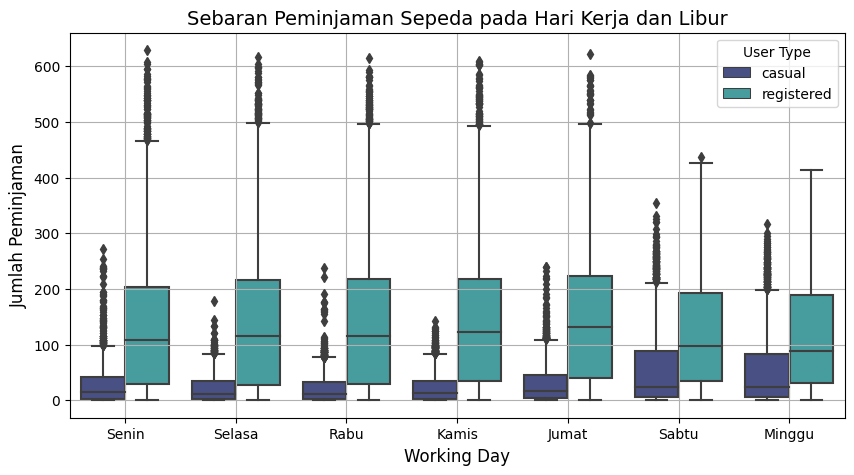

In [107]:
# Melebur (melt) data agar casual dan registered bisa tampil dalam satu boxplot
hour_data_melted = hour_data.melt(id_vars=['weekday'], value_vars=['casual', 'registered'], var_name='User Type', value_name='Count')
hour_data_melted['weekday'] = pd.Categorical(hour_data_melted['weekday'], categories=dayy, ordered=True)

# Membuat figure dan axis
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=hour_data_melted, x='weekday', y='Count', hue='User Type', palette="mako", ax=ax)
ax.set_title('Sebaran Peminjaman Sepeda pada Hari Kerja dan Libur', fontsize=14)
ax.set_xlabel('Working Day', fontsize=12)
ax.set_ylabel('Jumlah Peminjaman', fontsize=12)
plt.grid(True)
plt.show()

**Insight:**
- Peminjam registered lebih dominan dibandingkan peminjam casual baik pada hari kerja maupun hari libur.
- Terdapat peminjaman yang tidak biasa (outlier) pada hari libur maupun hari kerja. Bisa jadi terjadi karena adanya hari libur di antara hari Senin-Jumat dan adanya acara besar.
- Peminjam casual lebih aktif saat hari libur untuk berekreasi.
- Distribusi peminjaman pada hari libur lebih bervariasi terutama pada peminjam casual.

In [108]:
workingday_tren = hour_data_clean.groupby('workingday')[['casual', 'registered', 'cnt']].agg(['min', 'max', 'mean']).reset_index()
workingday_tren

workingday casual                 registered                  cnt       \
                 min  max       mean        min  max        mean min  max   
0     Holiday      0  367  57.441422          0  601  123.963910   1  783   
1  Workingday      0  264  25.561315          0  886  167.646439   1  977   

               
         mean  
0  181.405332  
1  193.207754

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


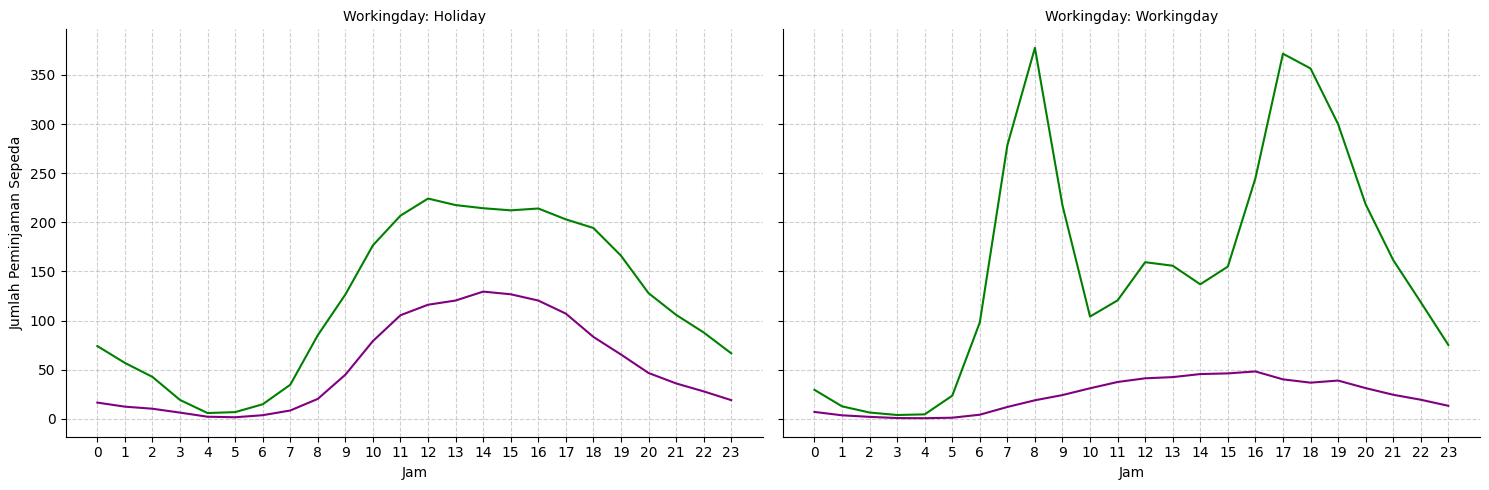

In [109]:
hour_data_melted = hour_data.melt(id_vars=['workingday'], value_vars=['casual', 'registered'], var_name='User Type', value_name='Count')
g = sns.FacetGrid(hour_data, col='workingday', height=5, aspect=1.5)
g.map_dataframe(sns.lineplot, x='hr', y='casual',  ci=None, color='Purple')
g.map_dataframe(sns.lineplot, x='hr', y='registered',  ci=None, color='Green')

# Judul dan Label
g.set_axis_labels('Jam', 'Jumlah Peminjaman Sepeda')
g.set_titles(col_template="Workingday: {col_name}")

# Konfigurasi tambahan untuk sumbu
for ax in g.axes.flat:
    ax.set_xticks(hour_data_clean['hr'].unique())  # Menampilkan semua jam pada sumbu x
    ax.grid(True, linestyle="--", alpha=0.6) 

plt.show()

**Insight:**
1. Pada Wokringday = 0 (bukan hari kerja/libur)
- Pola pelanggan casual dan registered memiliki pola yang sama.
- Peminjaman baik pada pelanggan casual dan registered mengalami puncak peningkatan peminjaman pada siang hari.
- Peminjaman pelanggan registered lebih tinggi dibandingkan pelanggan casual.
2. Pada Workingday = 1 (hari kerja)
- Pola pelanggan casual dan registered memiliki pola yang berbeda.
- Peminjaman pelanggan registered meningalami puncak peningkatan pada pukul 8 pagi, 12-13 siang, dan 17 sore. 
- Peminjaman pelanggan casual mulai mengalami peningkatan pada pukul 7 pagi dan memuncak di pukul 17.

### Pertanyaan 3:
3. Bagaimana pola dari peminjaman sepeda pada setiap musimnya?

In [110]:
season = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
ses = ['Spring', 'Summer', 'Fall', 'Winter']
season_tren = day_data.groupby('season')[['casual', 'registered']].mean().reset_index()
season_tren['season'] = season_tren['season'].map(season)
# season_tren = season_tren.set_index('season').reindex(ses).reset_index()
season_tren

,season,casual,registered
0,Spring,334.928177,2269.204420
1,Summer,1106.097826,3886.233696
2,Fall,1202.611702,4441.691489
3,Winter,729.112360,3999.050562


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14404\2094240443.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=season_tren_vis, x='season', y='Count', hue='User Type', palette=['purple', 'green', 'red'], ax=ax, ci=None)


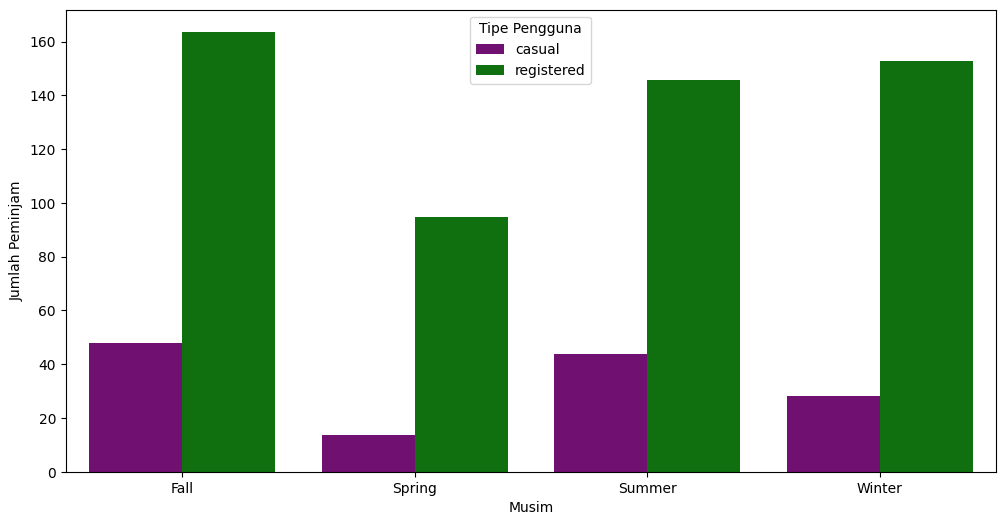

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengubah format data agar siap divisualisasikan
season_tren_vis = hour_data.melt(id_vars=['season'], value_vars=['casual', 'registered'], var_name='User Type', value_name='Count')

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=season_tren_vis, x='season', y='Count', hue='User Type', palette=['purple', 'green', 'red'], ax=ax, ci=None)

# Menambahkan judul dan label
# ax.set_title('Jumlah Peminjam Sepeda Berdasarkan Musim')
ax.set_xlabel('Musim')
ax.set_ylabel('Jumlah Peminjam')
ax.legend(title='Tipe Pengguna')

# Menampilkan plot
plt.show()


**Insight:**
- Peminjaman paling banyak dilakukan pada musim gugur baik pada pelanggan casual maupun registered.
- Peminjaman paling rendah terjadi pada musim semi baik pada pelanggan casual, maupun registered.

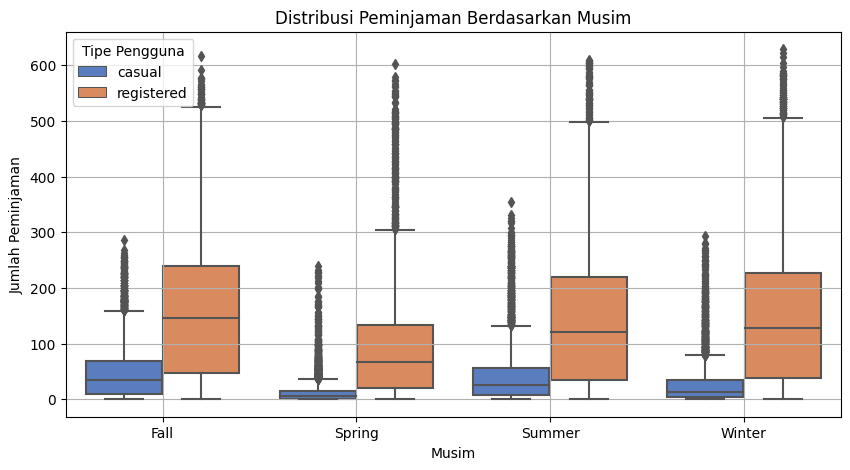

In [112]:
fig, ax = plt.subplots(figsize=(10, 5))
# Boxplot dengan hue berdasarkan kategori casual & registered
sns.boxplot(data=season_tren_vis, x='season', y='Count', hue='User Type', 
            palette="muted", ax=ax)

ax.set(title='Distribusi Peminjaman Berdasarkan Musim', xlabel='Musim', ylabel='Jumlah Peminjaman')
ax.grid(True)
ax.legend(title='Tipe Pengguna')

plt.show()


**Inisght:**
- Banyaknya titik hitam di atas boxplot, menunjukkan adanya lonjakan permintaan di hari-hari tertentu yang bisa saja terjadi karena cuaca ekstrem, acara khusus, dan akhir pekan.
- Musim gugur (fall) dan musim panas (summer), memiliki median lebih tinggi. Menunjukkan rata-rata peminjaman lebih banyak pada musim ini.
- Musim dingin (winter) memiliki distribusi yang cukup stabil.
- Musim berpengaruh terhadap pola peminjaman.

<Axes: >

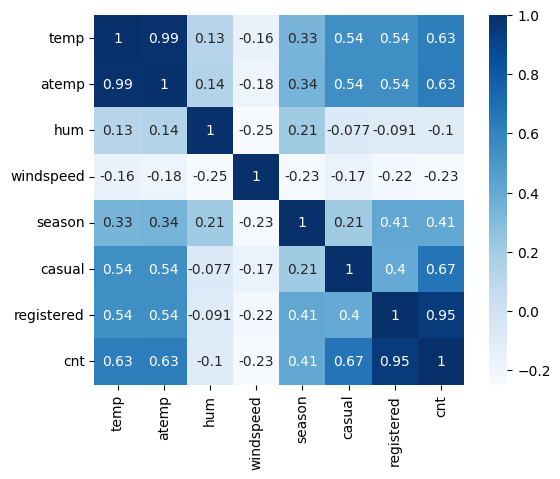

In [113]:
corr_Season = day_data[['temp', 'atemp', 'hum', 'windspeed', 'season', 'casual','registered', 'cnt']].corr()
# mask = np.array(corr_Season)
# mask[np.tril_indices_from(mask)] = False

sns.heatmap(corr_Season, square=True, annot=True, cmap='Blues')

**Insight:**
- Kondisi cuaca sangat berpengaruh terhadap peminjaman sepeda yang ditandai dengan matriks korelasi.
- Temperatur (temp), temperatur yang terasa (atemp), kecepatan angin (windspeed), dan musim (season) berpengaruh terhadap peminjaman.
- Hanya kelembapan (hum) yang tidak berpengaruh terhadap peminjaman sepeda.

## Conclusion
**Q1 (Pola peminjaman sepeda berdasarkan jam)**
- Peminjam dengan kategori registered lebih tinggi dibandingkan peminjam kategori casual.
- Pola peminjam kategori registered mengalami lonjakan pada pukul 7-9 pagi dan 17-19 pagi. Menandakan peminjam digunakan untuk keperluan kantor atau sekolah.
- Pola peminjam kategori casual mulai meningkat hingga pukul 11-18 sore. Menandakan peminjam untuk keperluan aktivitas di siang hari.
- Adanya outlier di jam sibuk (7-9 dan 17-19) dan jam malam (21-23), menunjukkan adanya lonjakan peminjaman pada hari-hari tertentu.

**Q2 Tren peminjaman pada hari kerja vs hari libur**
- Baik hari libur maupun hari kerja, peminjam kategori registered lebih dominan dibandingkan dengan hari libur.
- Peminjam casual lebih aktif dan bervariasi pada akhir pekan dibandingkan dan hari kerja untuk berekreasi.
- Peminjam registered lebih aktif pada hari kerja dibandingkan hari libur.
- Pola peminjam di hari libur pada kategori casual dan registered hampir, meningkat pada pukul 11 - 18 sore.

**Q3 Pola peminjaman pada setiap musim**
- Musim gugur (fall) dan musim panas (summer), memiliki median lebih tinggi. Menunjukkan rata-rata peminjaman lebih banyak pada musim ini.
- Terdapat banyak outlier lonjakan permintaan di hari-hari tertentu, seperti cuaca ekstrem, acara khsus, dan akhir pekan.
- Musim dingin (winter) memiliki distribusi yang cukup stabil.
- Kecepatan angin, suhu, dan musim berpengaruh terhadap permintaan, terutama peminjam registered.